## **Final Project**

### Kelompok 5 :  Anita - Kamil - Kevin - Luthfi

### Anita Antono -> Machine Learning (Unsupervised Learning dan Regression)
---

## --------------- Unsupervised Learning ------------------

### **Data Understanding**
---

Hello everyone, this project is about calorie prediction with machine learning using python. We will predict calorie based on some features.

Calories in the foods we eat provide energy in the form of heat so that our bodies can function. This means that we need to eat a certain amount of calories just to sustain life. But if we take in too many calories, then we risk gaining weight.

So there is need to burn Calories, for burning calories we doing exercises and more. for know how much calories we have burn Today we are going to buid a machine learning model that predict calories based on some data.'

Dataset lengkap dapat dilihat pada website ini <a href='https://devhadvani147.medium.com/calorie-prediction-machine-learning-project-using-python-b85a9dfc9220'>Medium</a>

<ins>**Column Information:**<ins>

| Feature          | Description                                                                                                        |
| ---------------- | ------------------------------------------------------------------------------------------------------------------ |
| User_ID          | User ID                                                                                                            |
| Gender           | Whether the customer is a male or a female                                                                         |
| Age              | Age                                                                                                                |
| Height           | About user height                                                                                                  |
| Weight           | About user weight                                                                                                  |
| Duration         | How long user does the activity?                                                                                   |
| Heart_Rate       | User Heart Rate                                                                                                    |
| Body_Temp        | User Body Temperature                                                                                              |
| Calories         | About user calories                                                                                                |

### **Import Libraries**
---

In [703]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from yellowbrick.cluster import SilhouetteVisualizer
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from scipy import stats
import seaborn as sns

from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.metrics import silhouette_score
import matplotlib as mpl

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

pd.options.mode.chained_assignment = None 
import warnings
warnings.filterwarnings('ignore')

## Libraries for Model

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss,roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score

### **Data Loading**
---

In [704]:
data = pd.read_csv('calorie.csv')

In [705]:
df = data.copy()
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45
14996,17212577,female,27,165,65,6,85,39.2,23
14997,17271188,female,43,159,58,16,90,40.1,75
14998,18643037,male,78,193,97,2,84,38.3,11


In [706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [707]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


### **Exploratory Data Analysis / EDA** (1)
---

In [708]:
df.columns = [str(x).lower() for x in df.columns]

In [709]:
print("Total missing value on the dataset  :" , df.isnull().sum().sum())

pd.DataFrame({'missing value' : df.isnull().sum()})

Total missing value on the dataset  : 0


,missing value
user_id,0
gender,0
age,0
height,0
weight,0
duration,0
heart_rate,0
body_temp,0
calories,0


In [710]:
data_skew = pd.DataFrame({'columns':df.describe().columns, 'skew' : df.skew(axis=0)})
data_skew.reset_index(drop=True, inplace=True)
data_skew['status'] = np.where(data_skew['skew'].abs()>0.5, 'Skewed', 'Normal')
data_skew

,columns,skew,status
0,user_id,0.004788,Normal
1,age,0.473383,Normal
2,height,-0.006190,Normal
3,weight,0.226725,Normal
4,duration,0.004751,Normal
5,heart_rate,-0.010704,Normal
6,body_temp,-0.994382,Skewed
7,calories,0.505371,Skewed


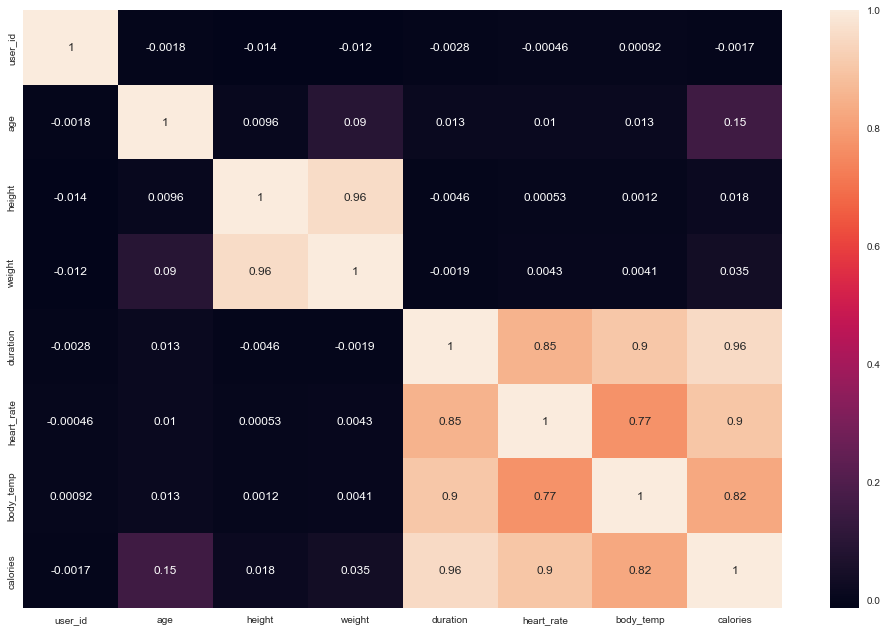

In [711]:
plt.figure(figsize=(17, 11))
corr_data = df.corr()
sns.heatmap(corr_data,annot=True)
plt.show()

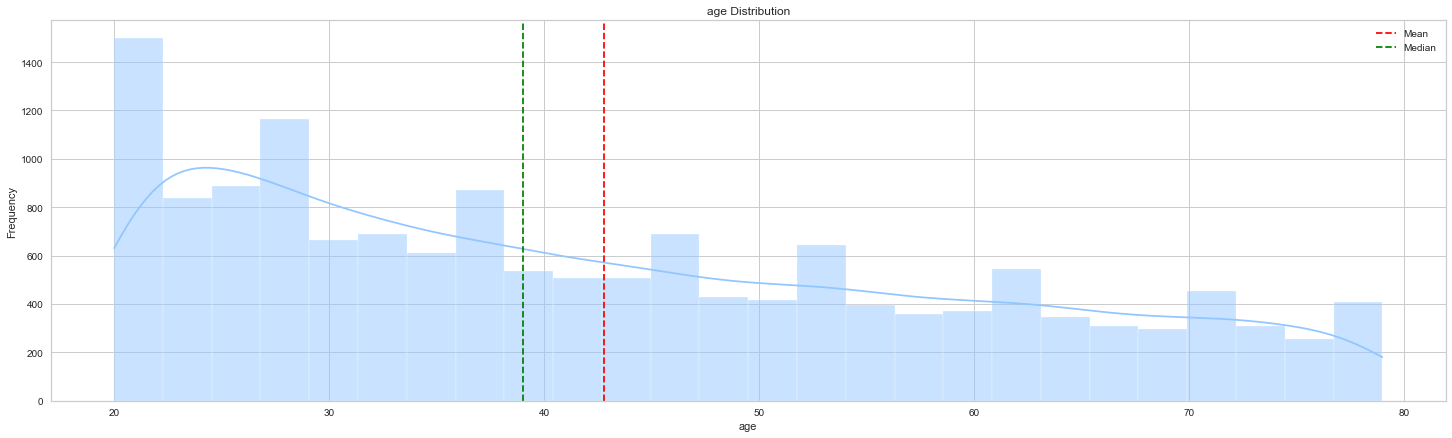

Skewness: 0.47338270096138746
Mean: 42.7898
Median: 39.0


In [712]:
plt.figure(figsize=(25, 7))
sns.histplot(x='age', data=df, kde=True)
plt.axvline(x=df.age.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=df.age.median(), color='green', linestyle='--', label='Median')
plt.title('age Distribution')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print(f'Skewness: {df.age.skew()}')
print(f'Mean: {df.age.mean()}')
print(f'Median: {df.age.median()}')

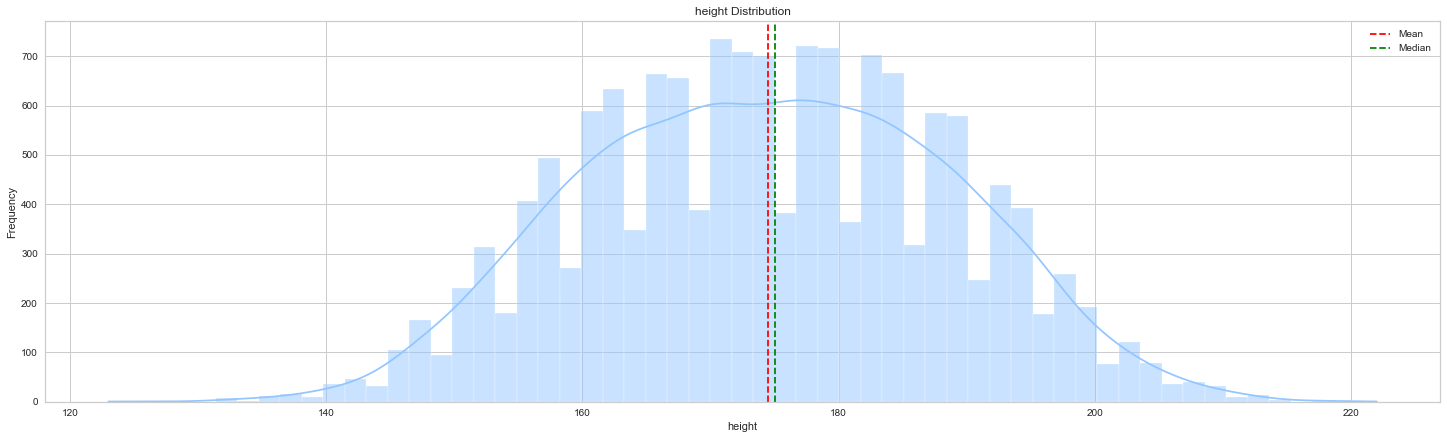

Skewness: -0.006189620437893538
Mean: 174.46513333333334
Median: 175.0


In [713]:
plt.figure(figsize=(25, 7))
sns.histplot(x='height', data=df, kde=True)
plt.axvline(x=df.height.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=df.height.median(), color='green', linestyle='--', label='Median')
plt.title('height Distribution')
plt.xlabel('height')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print(f'Skewness: {df.height.skew()}')
print(f'Mean: {df.height.mean()}')
print(f'Median: {df.height.median()}')

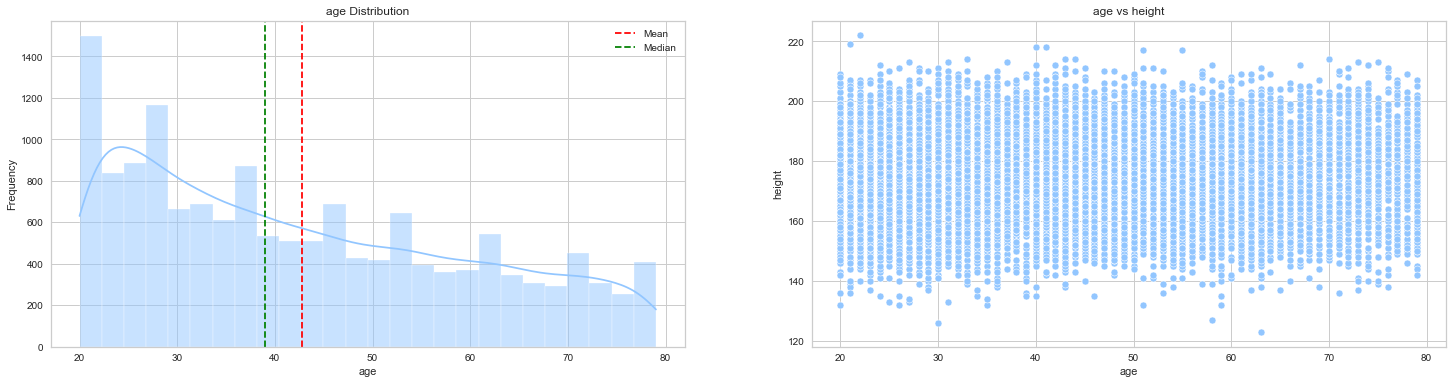

Skewness: 0.47338270096138746
Mean: 42.7898
Median: 39.0


In [714]:
plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
sns.histplot(x='age', data=df, kde=True)
plt.axvline(x=df.age.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=df.age.median(), color='green', linestyle='--', label='Median')
plt.title('age Distribution')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x='age', y='height', data=df)
plt.title('age vs height')
plt.show()

print(f'Skewness: {df.age.skew()}')
print(f'Mean: {df.age.mean()}')
print(f'Median: {df.age.median()}')

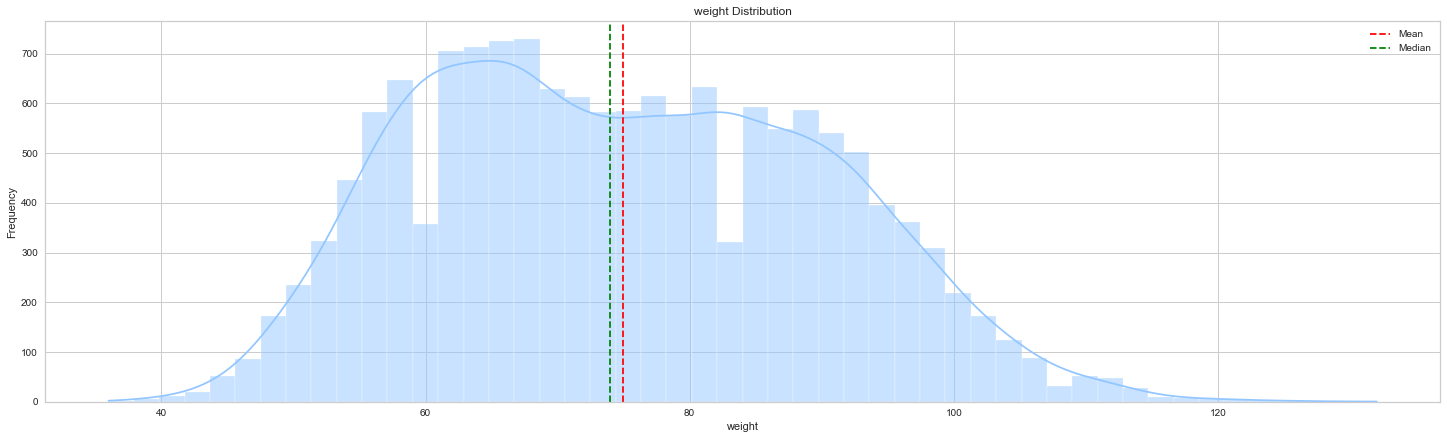

Skewness: 0.22672530725814513
Mean: 74.96686666666666
Median: 74.0


In [715]:
plt.figure(figsize=(25, 7))
sns.histplot(x='weight', data=df, kde=True)
plt.axvline(x=df.weight.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=df.weight.median(), color='green', linestyle='--', label='Median')
plt.title('weight Distribution')
plt.xlabel('weight')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print(f'Skewness: {df.weight.skew()}')
print(f'Mean: {df.weight.mean()}')
print(f'Median: {df.weight.median()}')

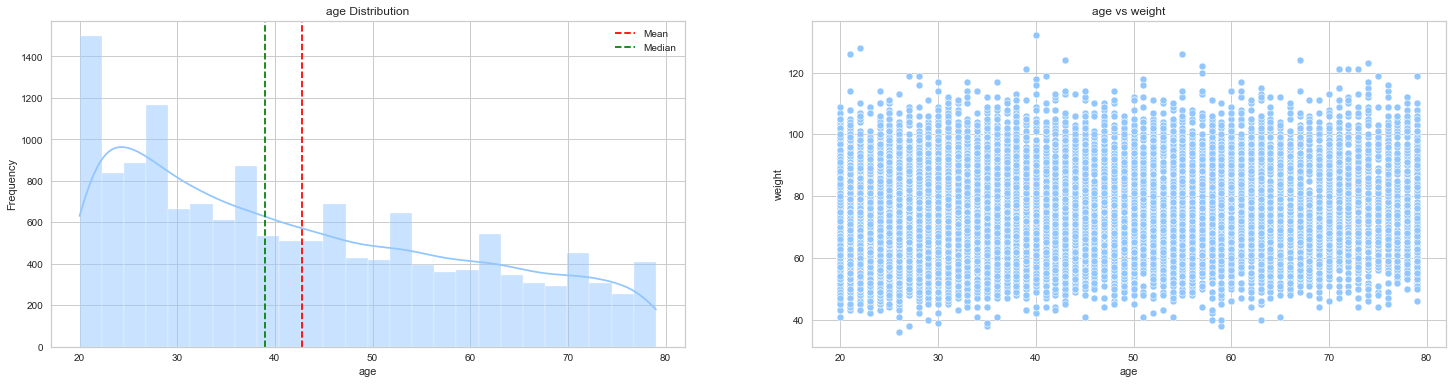

Skewness: 0.47338270096138746
Mean: 42.7898
Median: 39.0


In [716]:
plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
sns.histplot(x='age', data=df, kde=True)
plt.axvline(x=df.age.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=df.age.median(), color='green', linestyle='--', label='Median')
plt.title('age Distribution')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x='age', y='weight', data=df)
plt.title('age vs weight')
plt.show()

print(f'Skewness: {df.age.skew()}')
print(f'Mean: {df.age.mean()}')
print(f'Median: {df.age.median()}')

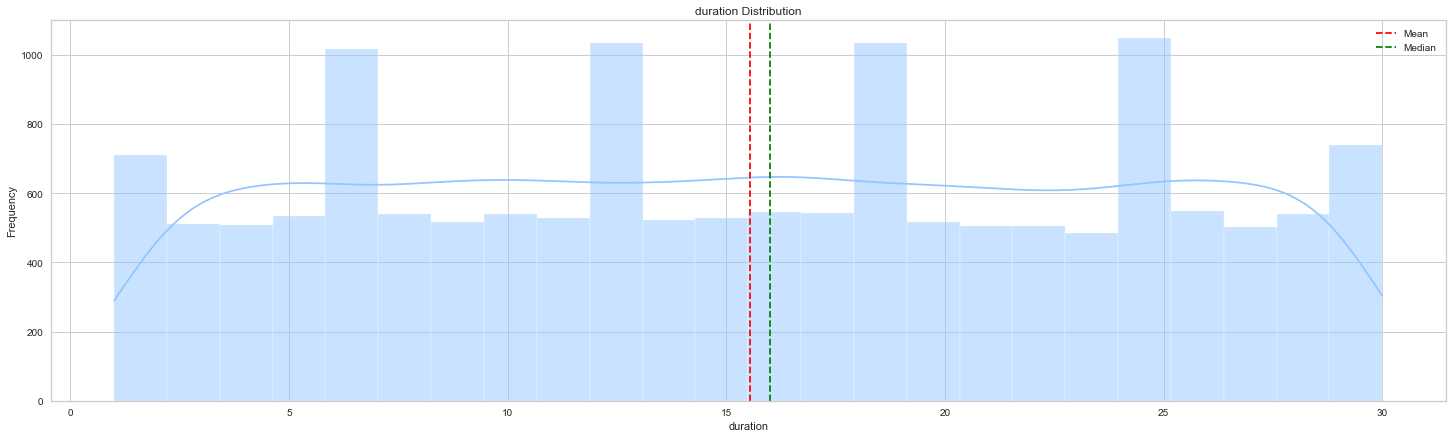

Skewness: 0.0047505366680978415
Mean: 15.5306
Median: 16.0


In [717]:
plt.figure(figsize=(25, 7))
sns.histplot(x='duration', data=df, kde=True)
plt.axvline(x=df.duration.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=df.duration.median(), color='green', linestyle='--', label='Median')
plt.title('duration Distribution')
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print(f'Skewness: {df.duration.skew()}')
print(f'Mean: {df.duration.mean()}')
print(f'Median: {df.duration.median()}')

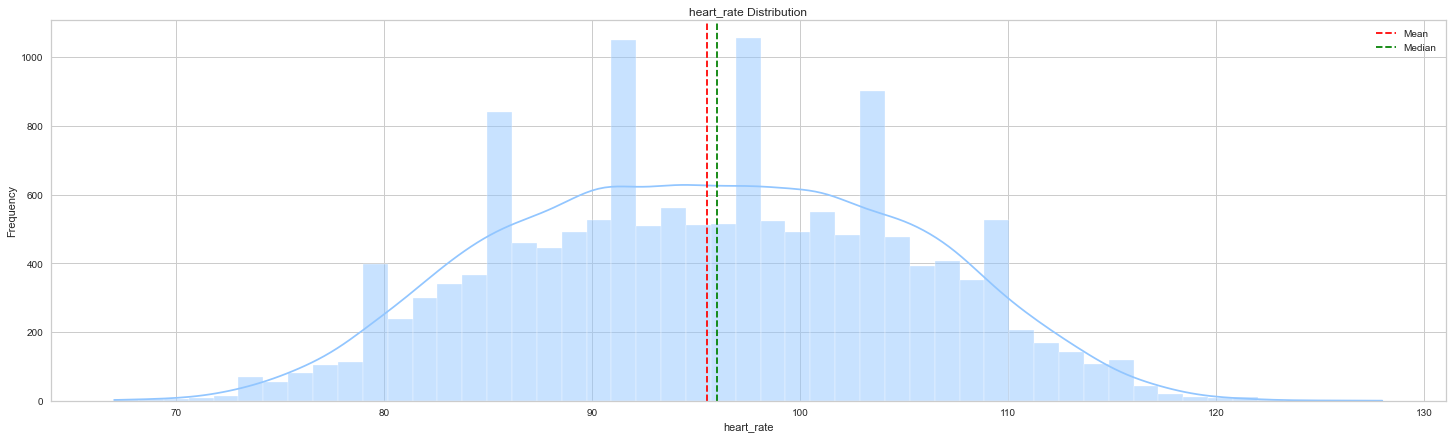

Skewness: -0.01070407972854895
Mean: 95.51853333333334
Median: 96.0


In [718]:
plt.figure(figsize=(25, 7))
sns.histplot(x='heart_rate', data=df, kde=True)
plt.axvline(x=df.heart_rate.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=df.heart_rate.median(), color='green', linestyle='--', label='Median')
plt.title('heart_rate Distribution')
plt.xlabel('heart_rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print(f'Skewness: {df.heart_rate.skew()}')
print(f'Mean: {df.heart_rate.mean()}')
print(f'Median: {df.heart_rate.median()}')

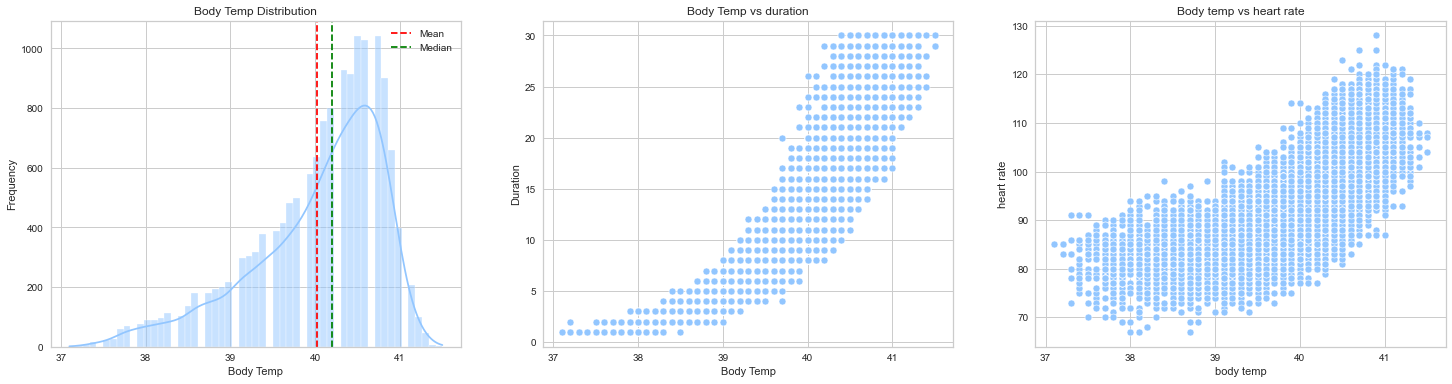

Skewness: -0.9943824155974582
Mean: 40.02545333333337
Median: 40.2


In [719]:
plt.figure(figsize=(25, 6))

plt.subplot(1, 3, 1)
sns.histplot(x='body_temp', data=df, kde=True)
plt.axvline(x=df.body_temp.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=df.body_temp.median(), color='green', linestyle='--', label='Median')
plt.title('Body Temp Distribution')
plt.xlabel('Body Temp')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 2)
sns.scatterplot(x='body_temp', y='duration', data=df)
plt.title('Body Temp vs duration')
plt.xlabel('Body Temp')
plt.ylabel('Duration')

plt.subplot(1, 3, 3)
sns.scatterplot(x='body_temp', y='heart_rate', data=df)
plt.title('Body temp vs heart rate')
plt.xlabel('body temp')
plt.ylabel('heart rate')
plt.show()

print(f'Skewness: {df.body_temp.skew()}')
print(f'Mean: {df.body_temp.mean()}')
print(f'Median: {df.body_temp.median()}')

### **Data Preprocessing**
---

##### Feature Selection

In [720]:
df_clustering = df[['duration', 'heart_rate', 'body_temp', 'calories']]
df_clustering

,duration,heart_rate,body_temp,calories
0,29,105,40.8,231
1,14,94,40.3,66
2,5,88,38.7,26
3,13,100,40.5,71
4,10,81,39.8,35
...,...,...,...,...
14995,11,92,40.4,45
14996,6,85,39.2,23
14997,16,90,40.1,75
14998,2,84,38.3,11


##### Feature Scaling

In [721]:
scaler = StandardScaler()

Melakukan **scaling** terhadap data `train` dan `test`.

In [722]:
df_clustering = scaler.fit_transform(df_clustering)

# Convert to dataframe
df_clustering = pd.DataFrame(df_clustering, columns=['duration', 'heart_rate', 'body_temp', 'calories'])

In [723]:
df_clustering

,duration,heart_rate,body_temp,calories
0,1.619127,0.989404,0.994023,2.265002
1,-0.183990,-0.158461,0.352342,-0.376905
2,-1.265861,-0.784569,-1.701035,-1.017367
3,-0.304198,0.467647,0.609015,-0.296847
4,-0.664821,-1.515029,-0.289338,-0.873263
...,...,...,...,...
14995,-0.544614,-0.367164,0.480679,-0.713147
14996,-1.145653,-1.097623,-1.059355,-1.065401
14997,0.056426,-0.575866,0.095670,-0.232801
14998,-1.626484,-1.201975,-2.214380,-1.257540


### **Model Definition (Unsupervised Learning)**
---

Pada bagian ini akan dibuat hanya **1 model** yang akan dievaluasi untuk melakukan clustering, yaitu:
**K-Means Clustering**

In [724]:
kmeans_clust = KMeans(n_clusters=3, random_state=25)

In [725]:
kmeans_clust.fit(df_clustering)

KMeans(n_clusters=3, random_state=25)

In [726]:
kmeans_label = pd.DataFrame(kmeans_clust.labels_, columns=['labels[kmeans_clust]'])
kmeans_label

,labels[kmeans_clust]
0,2
1,0
2,1
3,0
4,1
...,...
14995,0
14996,1
14997,0
14998,1


In [727]:
kmeans_label.value_counts('labels[kmeans_clust]')

labels[kmeans_clust]
0    5712
2    5075
1    4213
dtype: int64

##### Silhouette Diagram

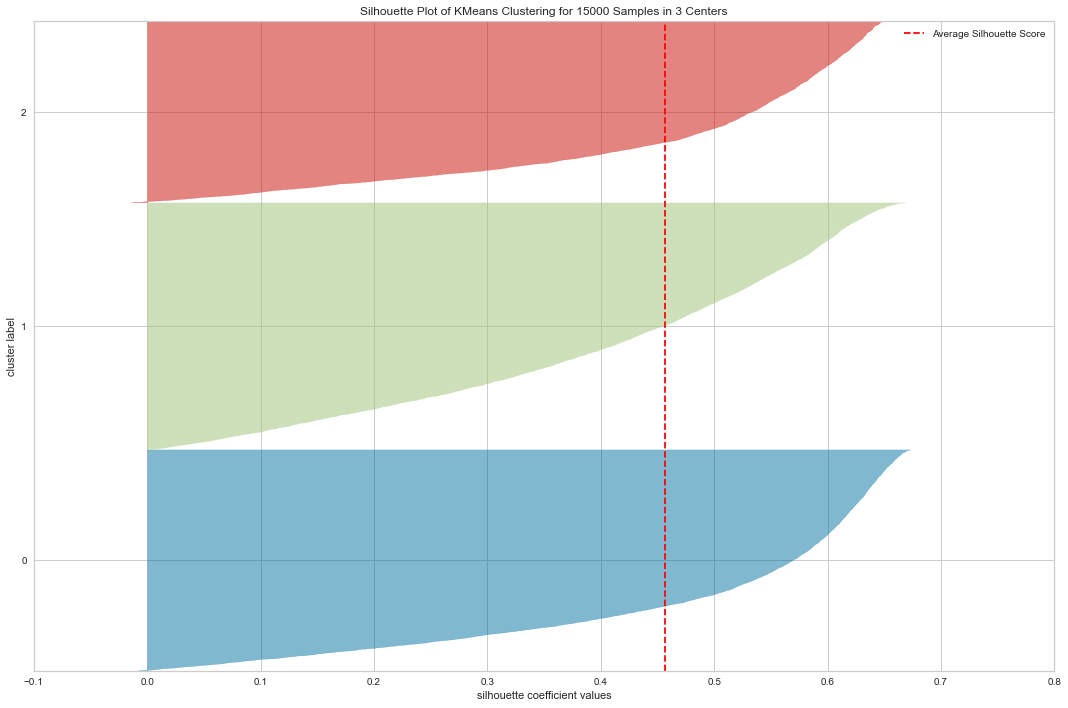

In [728]:
plt.figure(figsize=(15,10))

model = KMeans(3, init='k-means++', n_init=100, random_state=25)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_clustering)
visualizer.finalize()
    
plt.tight_layout()

**Note:

- Dari hasil `silhouette diagram` peta pengelompokkan ini hasilnya cukup baik, dimana bentuk plot yang dihasilkan antar cluster tidak memiliki perbedaan yang sangat signifikan(hanya terdapat satu kelompok yang sedikit kecil namun masih seragam, jadi menurut saya hasil ini cukup baik)

##### PCA Visualization

In [729]:
pca_viz = PCA(n_components=2)
pca_viz_show = pca_viz.fit_transform(df_clustering)
pca_df = pd.DataFrame.from_records(data=pca_viz_show, columns=["x1","x2"])
pca_df["labels"] = kmeans_clust.labels_ + 1

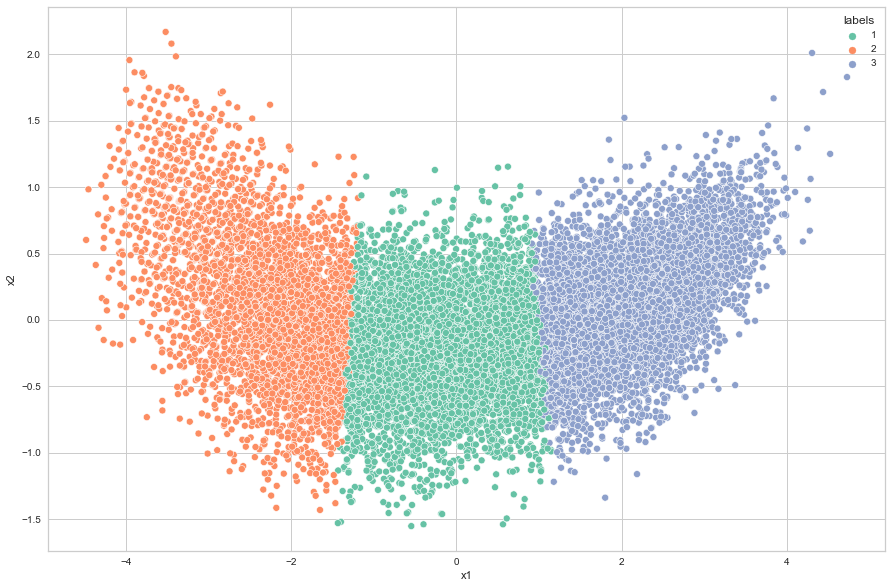

In [730]:
# Result Visualization
plt.figure(figsize=(15,10))

sns.scatterplot(x='x1', y='x2', hue='labels', data=pca_df, legend='full', palette='Set2')

plt.show()

**Note: 
- Label 1 (warna hijau)
Dari persebaran data pada Label 1 ini bisa kita lihat sangat dekat dengan kelompoknya walaupun beberapa terpisah namun tidak tercampur dengan Label lain

- Label 2 (warna orange)
Dari persebaran data pada Label 2 ini bisa kita lihat banyak yang terpisah dari kelompok nya, namun tidak tercampur dengan Label lain


- Label 3 (warna ungu)
Dari persebaran data pada Label 3 ini bisa kita lihat lumayan banyak juga yang terpisah dari kelompoknya, namun tidak sebanyak pada Label 2

Namun itu tidak menjadi masalah, pada masing masing Label terlihat juga tidak saling meng-invasi Label lainnya.

In [731]:
kmeans_label = pd.DataFrame(kmeans_clust.labels_, columns=['labels'])
kmeans_label

,labels
0,2
1,0
2,1
3,0
4,1
...,...
14995,0
14996,1
14997,0
14998,1


In [732]:
kmeans_label.value_counts('labels')

labels
0    5712
2    5075
1    4213
dtype: int64

In [733]:
df_regression = pd.concat([df, kmeans_label], axis=1)
df_clustering_final = df_regression[['duration', 'heart_rate', 'body_temp', 'calories', 'labels']]
df_clustering_final

,duration,heart_rate,body_temp,calories,labels
0,29,105,40.8,231,2
1,14,94,40.3,66,0
2,5,88,38.7,26,1
3,13,100,40.5,71,0
4,10,81,39.8,35,1
...,...,...,...,...,...
14995,11,92,40.4,45,0
14996,6,85,39.2,23,1
14997,16,90,40.1,75,0
14998,2,84,38.3,11,1


**Note:

- Dalam model `K Means` terdapat satu cluster yang memiliki jumlah anggota paling banyak diantara cluster yang lain. Nanti akan dijelaskan pada EDA kedua.

### **Exploratory Data Analysis / EDA** (2)
---

##### Cluster Proportions

In [734]:
colors = sns.color_palette("Pastel2")
colors2 = sns.color_palette("Blues")
sns.set_style("whitegrid")
plt.style.use('seaborn-pastel')


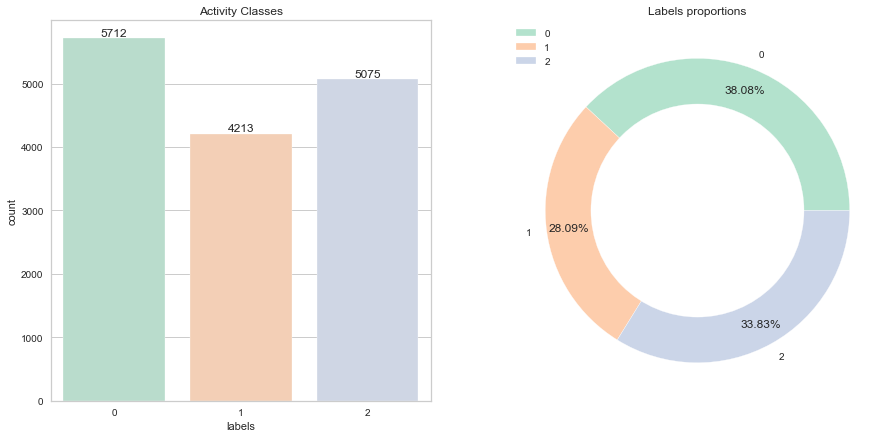

In [735]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
ax = sns.countplot(x='labels', data=df_clustering_final, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Activity Classes')

plt.subplot(1,2,2)
plt.pie(df_clustering_final.value_counts('labels').sort_index(), labels=df_clustering_final.value_counts('labels').sort_index().index, autopct="%.2f%%", pctdistance=0.85, colors=colors)
plt.title("Labels proportions")
plt.legend()
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

**Note:

- Dari chart diatas bisa kita lihat Cluster 1 memiliki 4213 orang / sebanyak 28,09%
- Sedangkan pada Cluster 2 memiliki 5075 orang / sebanyak 33,83%
- Dan terakhir pada Cluster 0 memiliki 5712 orang / sebanyak 38,08%


In [736]:
df_clustering_final

,duration,heart_rate,body_temp,calories,labels
0,29,105,40.8,231,2
1,14,94,40.3,66,0
2,5,88,38.7,26,1
3,13,100,40.5,71,0
4,10,81,39.8,35,1
...,...,...,...,...,...
14995,11,92,40.4,45,0
14996,6,85,39.2,23,1
14997,16,90,40.1,75,0
14998,2,84,38.3,11,1


##### Duration

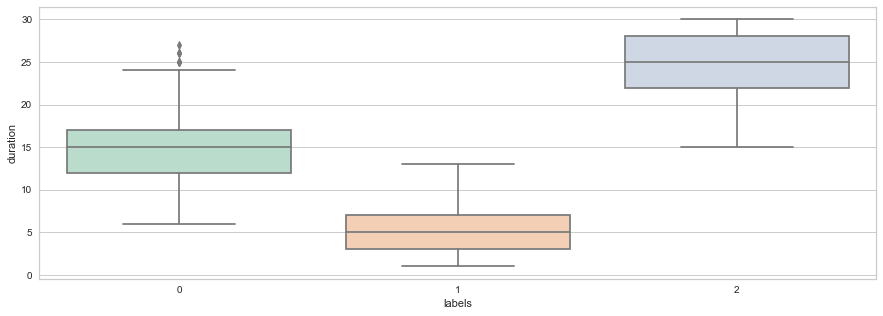

In [737]:
plt.figure(figsize=(15, 5))

ax = sns.boxplot(data=df_clustering_final, x='labels', y='duration', palette=colors)
plt.show()

In [738]:
df_clustering_final['duration'][(df_clustering_final['labels']==1)].mean()

5.30524566816995

In [739]:
df_clustering_final['duration'][(df_clustering_final['labels']==2)].mean()

24.877241379310345

In [740]:
df_clustering_final['duration'][(df_clustering_final['labels']==0)].mean()

14.768207282913165

**Note:

- Pada Cluster 1 dapat kita lihat rata-rata **'Duration'** (durasi) waktu melakukan aktivitas nya tergolong **singkat** sekitar 5 menit
- Pada Cluster 2 dapat kita lihat rata-rata **'Duration'** (durasi) waktu melakukan aktivitas nya tergolong **lama** sekitar 24 menit
- Pada Cluster 0 dapat kita lihat rata-rata **'Duration'** (durasi) waktu melakukan aktivitas nya tergolong **menengah** sekitar  14 menit

Cluster 2 adalah cluster yang anggota nya paling lama melakukan aktivitas, dengan tingkat durasi tertinggi selama 24 menit.
Cluster 14 sekitar 14 menit, durasi menengah. dan Cluster 0 paling singkat dengan durasi 5 menit.

##### Heart rate

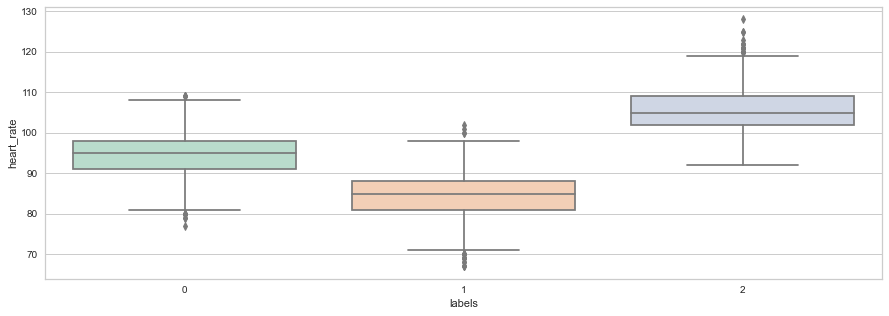

In [741]:
plt.figure(figsize=(15, 5))

ax = sns.boxplot(data=df_clustering_final, x='labels', y='heart_rate', palette=colors)
plt.show()

In [742]:
df_clustering_final['heart_rate'][(df_clustering_final['labels']==1)].mean()

84.68407310704961

In [743]:
df_clustering_final['heart_rate'][(df_clustering_final['labels']==2)].mean()

105.61655172413793

In [744]:
df_clustering_final['heart_rate'][(df_clustering_final['labels']==0)].mean()

94.53781512605042

**Note:

- Pada **Cluster 1** dapat kita lihat rata-rata **'heart_rate'** (detak jantung) nya sekitar **85 bpm** / 85 detak per-menit
- Pada **Cluster 2** dapat kita lihat rata-rata **'heart_rate'** (detak jantung) nya sekitar **106 bpm** / 106 detak per-menit
- Pada **Cluster 0** dapat kita lihat rata-rata **'heart_rate'** (detak jantung) nya sekitar **94 bpm** / 94 detak per-menit

Dari ketiga cluster diatas, Cluster 2 memiliki anggota dengan 'duration' / waktu yang paling lama melakukan aktivitas sehingga sangat wajar jika detak jantung nya juga yang paling tinggi.

##### Body Temperature

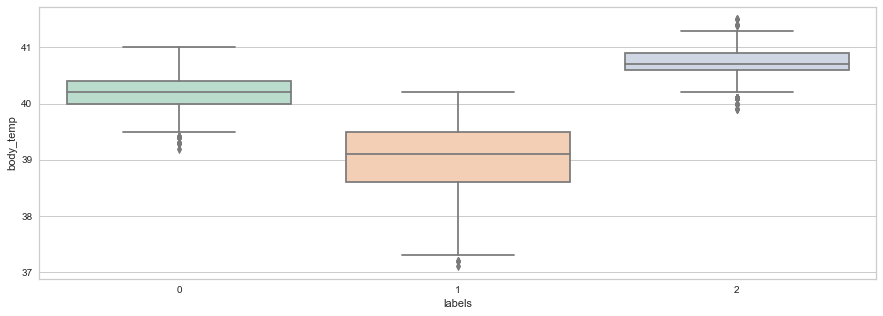

In [745]:
plt.figure(figsize=(15, 5))

ax = sns.boxplot(data=df_clustering_final, x='labels', y='body_temp', palette=colors)
plt.show()

In [746]:
df_clustering_final['body_temp'][(df_clustering_final['labels']==1)].mean()

39.0036316164255

In [747]:
df_clustering_final['body_temp'][(df_clustering_final['labels']==2)].mean()

40.71272906403937

In [748]:
df_clustering_final['body_temp'][(df_clustering_final['labels']==0)].mean()

40.168487394957886

**Note:

- Pada **Cluster 1** dapat kita lihat rata-rata **'Body_Temp'** (suhu tubuh) nya sekitar **39° Celcius** 
- Pada **Cluster 2** dapat kita lihat rata-rata **'Body_Temp'** (suhu tubuh) nya sekitar **41° Celcius** 
- Pada **Cluster 0** dapat kita lihat rata-rata **'Body_Temp'** (suhu tubuh) nya sekitar **40° Celcius** 

Dari ketiga cluster diatas, Cluster 1, 2 dan 3 rata-rata memiliki anggota dengan 'Body_Temp' / suhu tubuh yang tidak terlalu jauh significant. Mungkin ini dikarenakan suhu tubuh setiap orang berbeda, tidak hanya tergantung pada aktivitas harian namun dapat dipengaruhi juga dengan faktor cuaca, kesehatan, dan lain nya.

##### Calories

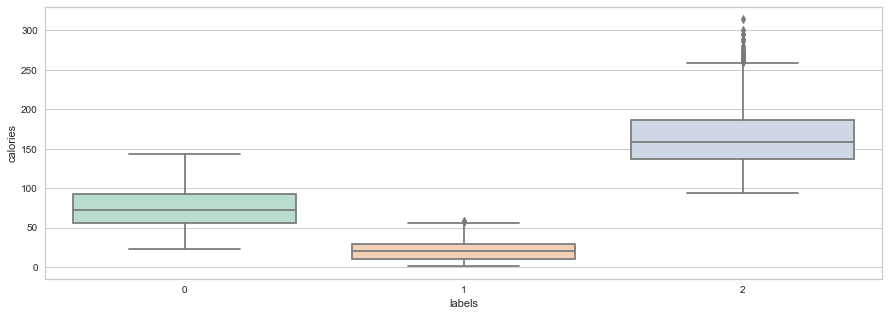

In [749]:
plt.figure(figsize=(15, 5))

ax = sns.boxplot(data=df_clustering_final, x='labels', y='calories', palette=colors)
plt.show()

In [750]:
df_clustering_final['calories'][(df_clustering_final['labels']==1)].mean()

20.558746736292427

In [751]:
df_clustering_final['calories'][(df_clustering_final['labels']==2)].mean()

163.37024630541873

In [752]:
df_clustering_final['calories'][(df_clustering_final['labels']==0)].mean()

74.82055322128852

**Note:

- Pada **Cluster 1** dapat kita lihat rata-rata **'calories'** (kalori yang dikeluarkan) nya sekitar **20 KAL** 
- Pada **Cluster 2** dapat kita lihat rata-rata **'calories'** (kalori yang dikeluarkan) nya sekitar **163 KAL** 
- Pada **Cluster 0** dapat kita lihat rata-rata **'calories'** (kalori yang dikeluarkan) nya sekitar **74 KAL** 

Dari ketiga cluster diatas, anggota Cluster 1 paling sedikit mengeluarkan kalori, hanya 20 KAL mungkin karena tingkat aktivitas nya yang rendah. 
Cluster 2 adalah Cluster dengan anggota yang paling tinggi tingkat aktivitas nya karena itu sudah pasti mengeluarkan kalori terbesar sebanyak 163 KAL, 
sedangkan Cluster 0 berada di tingkat aktivitas sedang, kalori yang dikeluarkan sedang sebanyak 74 KAL.

### **Conclusion (Unsupervised Learning)**
---

                                                                **Analysis kesimpulan**

<ins>**Information project:**<ins>

Project yang kami buat untuk final project ini tentang prediksi kalori menggunakan `Machine Learning` , `Unsupervised Learning`. 
disini kami bertujuan memprediksi kalori berdasarkan beberapa fitur yang tersedia pada dataset yang kami gunakan.

Untuk informasi dataset yang kami gunakan dapat di check pada webiste :
<a href='https://devhadvani147.medium.com/calorie-prediction-machine-learning-project-using-python-b85a9dfc9220'>Medium</a>

Dalam kehidupan sehari hari manusia tentunya membutuhkan makanan sebagai sumber energy yang dibutuhkan oleh tubuh untuk melakukan aktivitas. 
Sumber asupan kalori yang dibutuhkan manusia berasal dari makanan yang di konsumsi tentunya. Namun masing masing orang memiliki kebutuhan kalori yang berbeda pastinya, 
tergantung tubuhnya. Pada umumnya tergantung pada aktivitas harian yang dilakukan masing masing orang.

Project yang kami buat ini berdasarkan dataset-nya terdapat fitur yang memprediksi kalori yang dibutuhkan oleh manusia berdasarkan fitur seperti;
- Gender
- Usia
- Tinggi badan
- Berat badan
- Durasi aktivitas harian tiap orang
- Detak jantung
- Suhu tubuh

Kalori dalam makanan yang kita konsumsi memberikan energy berupa panas agar tubuh kita berkerja. Ini berarti bahwa kita perlu makan setiap hari, dengan sejumlah kalori untuk bertahan hidup. Tetapi jika kita terlalu banyak konsumsi asupan kalori dari makanan yang kita makan, sudah pasti berisiko menambah berat badan pada tubuh kita.
Jadi kita pun ada kebutuhan untuk membakar kalori berlebih yang kita konsumsi, nah disini untuk membakar kalori kita biasanya melakukan aktivitas atau berolahraga.
Untuk mengetahui berapa banyak kalori yang telah kita bakar hari ini kita akan membuat model `Machine Learning` yang memprediksi kalori harian masing masing orang berdasarkan beberapa fitur yang telah di data. 


<ins>**Analysis Model dan EDA:**<ins>

Pada project ini kami menggunakan metode `Unsupervised Learning` dengan model `K-Means Clustering`.

Kami menggunakan 3 label dengan tujuan prediksi 'Daily Activity Intensity' nya, 
Dari hasil `Silhouette Diagram` peta pengelompokkan hasilnya cukup baik, dimana bentuk plot yang dihasilkan antar cluster tidak memiliki perbedaan yang sangat signifikan
(hanya terdapat satu kelompok yang sedikit kecil namun bentuknya masih seragam, jadi menurut kami hasil ini cukup baik).

Kemudian, hasil `PCA VISUALIZATION` menghasilkan persebaran anggota dari 3 label yang kami gunakan sebagai berikut,
- Label 1 (warna hijau)
Dari persebaran data pada Label 1 ini bisa kita lihat sangat dekat dengan kelompoknya walaupun beberapa terpisah namun tidak tercampur dengan Label lain
- Label 2 (warna orange)
Dari persebaran data pada Label 2 ini bisa kita lihat banyak yang terpisah dari kelompok nya, namun tidak tercampur dengan Label lain
- Label 3 (warna ungu)
Dari persebaran data pada Label 3 ini bisa kita lihat lumayan banyak juga yang terpisah dari kelompoknya, namun tidak sebanyak pada Label 2
Namun itu tidak menjadi masalah, pada masing masing Label terlihat juga tidak saling meng-invasi Label lainnya.

Setelah model, saya mengambil analysis dari EDA berdasarkan fitur berikut..

Pada `Cluster 1` memiliki anggota sebanyak 4213, atau 28,09%, `Cluster 2` memiliki anggota sebanyak 5075 sekitar 33,83%, dan terakhir `Cluster 0` memiliki anggota terbanyak 5712 orang, 38,08%.
Untuk mengetahui tingkat aktivitas pada setiap Cluster, kami melihat nya dari beberapa fitur untuk dijadikan kelas `Activity Intensity` nya akan dibuat 3 kelas `Low Activity` - `Medium Activity` dan `High Activity`.

- <ins>`Duration`<ins> [Durasi melakukan aktivitas harian, akan dihitung dalam satuan menit]

* Pada Cluster 1 dapat kita lihat rata-rata waktu melakukan aktivitas nya tergolong **singkat** sekitar 5 menit
* Pada Cluster 2 dapat kita lihat rata-rata waktu melakukan aktivitas nya tergolong **lama** sekitar 24 menit
* Pada Cluster 0 dapat kita lihat rata-rata waktu melakukan aktivitas nya tergolong **menengah** sekitar  14 menit

- <ins>`Heart Rate`<ins> [Detak jantung saat melakukan aktivitas, akan dihitung dalam satuan `bpm` (`beats per minute`)]

* Pada **Cluster 1** dapat kita lihat rata-rata **'heart_rate'** (detak jantung) nya sekitar **85 bpm** / 85 detak per-menit
* Pada **Cluster 2** dapat kita lihat rata-rata **'heart_rate'** (detak jantung) nya sekitar **106 bpm** / 106 detak per-menit
* Pada **Cluster 0** dapat kita lihat rata-rata **'heart_rate'** (detak jantung) nya sekitar **94 bpm** / 94 detak per-menit

- <ins>`Body Temperature`<ins> [Suhu tubuh saat melakukan aktivitas, akan dihitung dalam satuan suhu `Celcius`]

* Pada **Cluster 1** dapat kita lihat rata-rata **'Body_Temp'** (suhu tubuh) nya sekitar **39° Celcius** 
* Pada **Cluster 2** dapat kita lihat rata-rata **'Body_Temp'** (suhu tubuh) nya sekitar **41° Celcius** 
* Pada **Cluster 0** dapat kita lihat rata-rata **'Body_Temp'** (suhu tubuh) nya sekitar **40° Celcius** 

- <ins>`Calories`<ins> [Calorie yang terbuang saat melakukan aktivitas, akan dihitung dalam satuan kilokalori (`Kal`)]

* Pada **Cluster 1** dapat kita lihat rata-rata **'calories'** (kalori yang dikeluarkan) nya sekitar **20 KAL** 
* Pada **Cluster 2** dapat kita lihat rata-rata **'calories'** (kalori yang dikeluarkan) nya sekitar **163 KAL** 
* Pada **Cluster 0** dapat kita lihat rata-rata **'calories'** (kalori yang dikeluarkan) nya sekitar **74 KAL** 

Dari analysis `EDA` diatas saya mengambil kesimpulan dengan melakukan **perbandingan antar cluster** sebagai berikut :

`Cluster 0` adalah cluster dengan anggota paling singkat `duration` aktivitas nya selama **5 menit**, maka `heart rate` **85 bpm** sebenarnya ini terbilang normal namun jika dibandingkan dengan cluster lain, cluster ini paling rendah. karena normal heart rate manusia 60 to 100 beats per- menit. Namun untuk `body temperature` **39° Celcius** personal judgement saya adalah suhu tubuh tidak terlalu spesific karena setiap manusia bisa berbeda tidak hanya berdasarkan activitas harian, namun kesehatan bahkan cuaca dapat mempengaruhi. `calories` karena durasi activitas rendah wajar saja kalori yang dikeluarkan pun juga hanya sedikit, **20kal**.

`Cluster 1` adalah cluster dengan `duration` activitas anggota sekitar **14 menit**, bisa kita bilang sedang. `heart rate` **94 bpm** nya juga normal namun jika dibandingkan dengan 2 cluster lain angkanya ada di tingkat menengah, `body temperature` **40° Celcius**  juga sama personal judgment saya seperti diatas. `calories` karena durasi activitas sedang, kalori yang dikeluarkan juga sedang sebanyak **74kal**.

`Cluster 2` adalah cluster yang anggota nya paling lama melakukan `duration` aktivitas, dengan tingkat durasi tertinggi selama **24 menit**. `heart rate` **106 bpm** nya cukup tinggi karena melebihi normal. `body temperature`  **41° Celcius** juga sama personal judgment saya seperti diatas. `calories` karena durasi activitas tinggi, kalori yang dikeluarkan juga pasti paling besar **163Kal**.

Maka dapat disimpulkan `**Cluster 2**` adalah cluster yang memiliki anggota dengan tingkat aktivitas yang **High Activity** diantara 2 cluster lain. `**Cluster 0**` memiliki anggota dengan tingkat aktivitas **Medium Activity**, dan `**Cluster 1**` adalah cluster dengan anggota yang tingkat aktivitas nya paling **Low Activity**.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## --------------- Regression ------------------

### **Data Loading**
---

In [753]:
from sklearn.linear_model import LinearRegression

In [754]:
df_regression = df_regression.rename(columns={'labels': 'Activity_Intensity'})
df_regression

,user_id,gender,age,height,weight,duration,heart_rate,body_temp,calories,Activity_Intensity
0,14733363,male,68,190,94,29,105,40.8,231,2
1,14861698,female,20,166,60,14,94,40.3,66,0
2,11179863,male,69,179,79,5,88,38.7,26,1
3,16180408,female,34,179,71,13,100,40.5,71,0
4,17771927,female,27,154,58,10,81,39.8,35,1
...,...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45,0
14996,17212577,female,27,165,65,6,85,39.2,23,1
14997,17271188,female,43,159,58,16,90,40.1,75,0
14998,18643037,male,78,193,97,2,84,38.3,11,1


### **Exploratory Data Analysis / EDA**
---

In [755]:
df_regression.drop(['user_id'], axis=1, inplace=True)

In [756]:
df_regression.corr()

,age,height,weight,duration,heart_rate,body_temp,calories,Activity_Intensity
age,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395,0.050479
height,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537,-0.001086
weight,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481,0.002533
duration,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421,0.490026
heart_rate,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882,0.466952
body_temp,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558,0.269810
calories,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000,0.578194
Activity_Intensity,0.050479,-0.001086,0.002533,0.490026,0.466952,0.269810,0.578194,1.000000


In [798]:
colors = sns.color_palette("pastel")
colors2 = sns.color_palette("Pastel2")
sns.set_style("darkgrid")

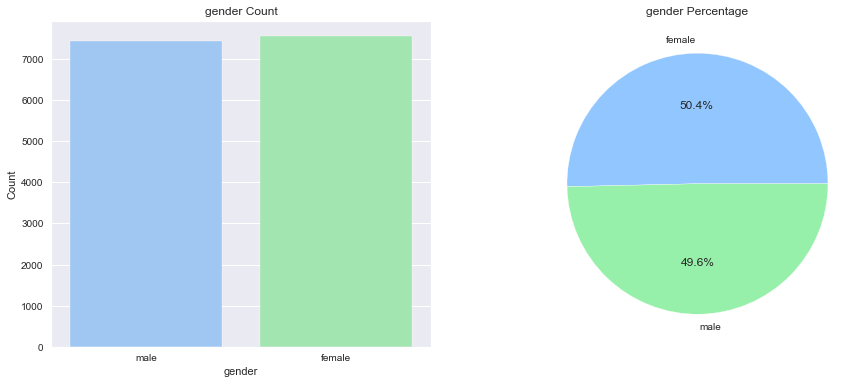

In [801]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='gender', data=df_regression)
plt.title('gender Count')
plt.xlabel('gender')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(df_regression.gender.value_counts(), labels=df_regression.gender.value_counts().index, autopct='%1.1f%%')
plt.title('gender Percentage')
plt.show()

### **Data Preprocessing**
---

##### Data Inference

In [757]:
# Get Data Inference
df_regression_inf = df_regression.sample(10, random_state=25)

# Remove Data Inference from main dataframe
df_regression = df_regression.drop(df_regression_inf.index)

df_regression_inf

,gender,age,height,weight,duration,heart_rate,body_temp,calories,Activity_Intensity
4505,female,56,150,51,6,88,39.3,29,1
8314,male,71,175,82,18,89,40.4,98,0
7131,female,30,173,69,3,89,38.8,13,1
7874,male,21,190,93,6,80,39.3,11,1
539,female,27,170,66,21,113,40.5,142,2
9303,male,21,188,89,4,80,38.6,7,1
13049,male,26,195,86,26,102,40.7,138,2
2902,male,24,193,84,21,100,40.1,103,0
10608,male,71,186,92,7,85,39.5,35,1
8757,female,31,158,52,5,89,39.2,22,1


Data diatas adalah **data inference** yang nantinya di uji pada model yang sudah dilatih dan divalidasi.

##### Split Dataset

Split data training dan data test dengan perbandingan:
- **80%** data menjadi **train**
- **20%** data menjadi **test**

In [758]:
# Splitting Dataset

# X will be consist of features only
X = df_regression.drop(['calories'], axis=1)

# y will be consist of target only
y = df_regression['calories']

In [759]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [760]:
# Size Summary

print('Train Set shape : ', X_train.shape)
print('Test Set shape : ', X_test.shape)
print('Inference Set shape : ', df_regression_inf.shape)

Train Set shape :  (10493, 8)
Test Set shape :  (4497, 8)
Inference Set shape :  (10, 9)


##### Feature Selection

Selanjutnya akan memisahkan kolom yang bertipe numeric dengan categorical pada `X_reg_train` dan `X_reg_test` menggunakan **Feature Scaling** dan **Feature Encoding**.

In [761]:
num_cols = ['age', 'height', 'weight']
cat_cols = ['gender', 'Activity_Intensity']

final_features = cat_cols + num_cols

print(f'Number of numerical columns: {len(num_cols)}')
print(f'Numerical columns: {num_cols}')
print(f'Number of categorical columns: {len(cat_cols)}')
print(f'Categorical columns: {cat_cols}')

Number of numerical columns: 3
Numerical columns: ['age', 'height', 'weight']
Number of categorical columns: 2
Categorical columns: ['gender', 'Activity_Intensity']


In [762]:
X_train = X_train[final_features]
X_test = X_test[final_features]

### **Pipeline**
---

Pada bagian ini akan dibuat pipeline untuk melakukan normalisasi data (**scaling**) menggunakan `StandardScaler()` dan melakukan **encoding** menggunakan `OneHotEncoder()` sekaligus untuk membuat model, dengan algoritma classification yang digunakan adalah **Linear Regression**, **Logistic Regression**, **Support Vector Machine Classifier**, **Decision Tree Classifier**, **Random Forest Classifier** .

Membuat pipeline untuk melakukan prepocessing features, dimana:
- `num_pipe` adalah pipeline untuk **scaling** features numerical menggunakan `StandardScaler()`
- `cat_pipe` adalah pipeline untuk **encoding** features categorical menggunakan `OneHotEncoder()`

Lalu, kedua pipeline akan digabungkan menjadi 1 pipeline **preprocessing** menggunakan `ColumnTransformer()`.

In [763]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score

In [764]:
# Preprocessing Pipeline
preprocess = ColumnTransformer([
    ('num',StandardScaler(), num_cols),
    ('cat',OneHotEncoder(handle_unknown= 'ignore'), cat_cols)
    ])


### **Model Definition**
---

Model yang akan dibuat sebagai berikut dan kemudian model akan di tuning menggunakan `GridSearchCV` :

- `Linear Regression` model untuk **Linear Regression**
- `SVR`      model untuk **Support Vector Regression**
- `Tree`     model untuk **Decision Tree**
- `Forest`   model untuk **Random Forest** 

* `Linear Regression`

In [765]:
# Model
linear = LinearRegression(n_jobs=-1)

# Model Pipeline
pipe_linear = Pipeline([
    ('preprocessing', preprocess),
    ('linear', linear)
])

# Hyper parameter
params_lr = {
    'linear__fit_intercept': [True, False]
}

* `Support Vector Machine - Regression` 

In [766]:
# Model
svr = SVR(cache_size=2000)

# Model Pipeline
pipe_svr = Pipeline([
    ('preprocessing', preprocess),
    ('svr', svr)
])

# Hyper parameter
params_svr = {
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__degree': [2, 3, 4],
    'svr__C': [0.1, 1, 10],
}

* `Decision Tree Regressor`

In [767]:
# Initial Model
tree = DecisionTreeRegressor(random_state=25)

# Model Pipeline
pipe_tree = Pipeline([
    ('preprocessing', preprocess),
    ('tree', tree)
])

# Hyper parameter
params_dtr = {
    'tree__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'tree__spliter': ['best', 'random'],
    'tree__max_features': ['auto', 'sqrt', 'log2'],
    'tree__min_samples_split': [2, 3, 4, 5, 6],
    'tree__min_samples_leaf': [2, 3, 4, 5, 6]

}

* `Random Forest Regressor`

In [768]:
# Initial Model
forest = RandomForestRegressor(random_state=25, n_jobs=-1)

# Model Pipeline
pipe_forest = Pipeline([
    ('preprocessing', preprocess),
    ('forest', forest)
])

# Hyper parameter
params_forest = {
    'forest__criterion': ['squared_error', 'absolute_error', 'poisson'],
    'forest__max_features': ['auto', 'sqrt', 'log2'],
    'forest__warm_start': [True, False],
    'forest__max_depth':np.arange(4, 16, 24),
    'forest__min_samples_split':np.arange(4, 16, 24),
    'forest__min_samples_leaf':np.arange(4, 16, 24)
}

### **Model Training**
---

In [769]:
# Cross-validate base model

# prepare models and put it into list
models = []
models.append(('linear', pipe_linear))
models.append(('svr', pipe_svr))
models.append(('tree', pipe_tree))
models.append(('forest', pipe_forest))

# Create empty list to stores result
names = []
results = []
mean_score = []
stdev_score = []

# Cross-validate each model
for name, model in models:
    model.fit(X_train,y_train)
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5, n_jobs=-1)

    names.append(name)
    results.append(scores)
    mean_score.append(round(np.mean(scores),4))
    stdev_score.append(round(np.std(scores),4))

cv_result = pd.DataFrame({'models':names, 'mean_score':mean_score, 'stdev_score':stdev_score})

In [806]:
# Showing the result
cv_result.sort_values(by='mean_score', ascending=False)

,models,mean_score,stdev_score
0,linear,0.8514,0.0035
3,forest,0.8349,0.0037
1,svr,0.8279,0.0044
2,tree,0.7193,0.0031


### **Model Evaluation**
---

In [771]:
# Hyperparameter tuning
grid_linear = GridSearchCV(
    pipe_linear, params_lr, cv=5, scoring='r2', n_jobs=-1, verbose=1
).fit(X_train, y_train)

best_params_linear = grid_linear.best_params_
best_pipe_linear = grid_linear.best_estimator_
df_result_linear = pd.DataFrame.from_dict(grid_linear.cv_results_, orient='columns')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [772]:
best_params_linear

{'linear__fit_intercept': False}

In [773]:
grid_linear.best_score_

0.8513728263059759

In [774]:
linear_best = grid_linear.best_estimator_
linear_best

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'height', 'weight']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender',
                                                   'Activity_Intensity'])])),
                ('linear', LinearRegression(fit_intercept=False, n_jobs=-1))])

In [775]:
# Hyperparameter tuning
grid_forest = GridSearchCV(
    pipe_forest, params_forest, cv=5, scoring='r2', n_jobs=-1, verbose=1
).fit(X_train, y_train)

best_params_forest = grid_forest.best_params_
best_pipe_forest = grid_forest.best_estimator_
df_result_forest = pd.DataFrame.from_dict(grid_forest.cv_results_, orient='columns')

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [776]:
best_params_forest

{'forest__criterion': 'squared_error',
 'forest__max_depth': 4,
 'forest__max_features': 'auto',
 'forest__min_samples_leaf': 4,
 'forest__min_samples_split': 4,
 'forest__warm_start': True}

In [777]:
grid_forest.best_score_

0.8587954817585061

In [778]:
forest_best = grid_forest.best_estimator_
forest_best

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'height', 'weight']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender',
                                                   'Activity_Intensity'])])),
                ('forest',
                 RandomForestRegressor(max_depth=4, min_samples_leaf=4,
                                       min_samples_split=4, n_jobs=-1,
                                       random_state=25, warm_start=True))])

#### Prediction Best Model

In [779]:
# Prediction on `Train_Set`
y_train_pred_1 = best_pipe_linear.predict(X_train).round(2)
y_train_pred_2 = best_pipe_forest.predict(X_train).round(2)

# Prediction on `Test_Set`
y_test_pred_1 = best_pipe_linear.predict(X_test).round(2)
y_test_pred_2 = best_pipe_forest.predict(X_test).round(2)

* Model Evaluation - `Linear Regressor`

In [780]:
# Evaluation for training phase
print('___________________ Train Results (Linear Regressor) ____________________')
print('MAE:',round(mean_absolute_error(y_train,y_train_pred_1),2))
print('R-squared Score:',round(r2_score(y_train,y_train_pred_1),2))

# Evaluation for testing phase
print('___________________ Test Results (Linear Regressor) _____________________')
print('MAE:',round(mean_absolute_error(y_test,y_test_pred_1),2))
print('R-squared Score:',round(r2_score(y_test,y_test_pred_1),2))

# Differences
print('___________________ Differences _________________________________________________')
print('MAE:',(round(mean_absolute_error(y_test,y_test_pred_1),2) - round(mean_absolute_error(y_train,y_train_pred_1),2)).round(2))
print('R-squared Score:',(round(r2_score(y_test,y_test_pred_1),2) - round(r2_score(y_train,y_train_pred_1),2)).round(2))

___________________ Train Results (Linear Regressor) ____________________
MAE: 19.0
R-squared Score: 0.85
___________________ Test Results (Linear Regressor) _____________________
MAE: 19.38
R-squared Score: 0.85
___________________ Differences _________________________________________________
MAE: 0.38
R-squared Score: 0.0


* Model Evaluation - `Random Forest Regressor`

In [781]:
# Evaluation for training phase
print('___________________ Train Results (Random Forest Regressor) ____________________')
print('MAE:',round(mean_absolute_error(y_train,y_train_pred_2),2))
print('R-squared Score:',round(r2_score(y_train,y_train_pred_2),2))

# Evaluation for testing phase
print('___________________ Test Results (Random Forest Regressor) _____________________')
print('MAE:',round(mean_absolute_error(y_test,y_test_pred_2),2))
print('R-squared Score:',round(r2_score(y_test,y_test_pred_2),2))

# Differences
print('___________________ Differences _________________________________________________')
print('MAE:',(round(mean_absolute_error(y_test,y_test_pred_2),2) - round(mean_absolute_error(y_train,y_train_pred_1),2)).round(2))
print('R-squared Score:',(round(r2_score(y_test,y_test_pred_2),2) - round(r2_score(y_train,y_train_pred_1),2)).round(2))

___________________ Train Results (Random Forest Regressor) ____________________
MAE: 18.47
R-squared Score: 0.86
___________________ Test Results (Random Forest Regressor) _____________________
MAE: 18.93
R-squared Score: 0.85
___________________ Differences _________________________________________________
MAE: -0.07
R-squared Score: 0.0


* Best Estimator ; `Linear Regression` & `Random Forest Regressor`

In [782]:
best_linear = grid_linear.best_estimator_
print('-------Logistic Regression Best Hyperparameter-------')
print(grid_linear.best_params_)


best_forest = grid_forest.best_estimator_
print('\n-------Random Forest Best Hyperparameter-------')
print(grid_forest.best_params_)


-------Logistic Regression Best Hyperparameter-------
{'linear__fit_intercept': False}

-------Random Forest Best Hyperparameter-------
{'forest__criterion': 'squared_error', 'forest__max_depth': 4, 'forest__max_features': 'auto', 'forest__min_samples_leaf': 4, 'forest__min_samples_split': 4, 'forest__warm_start': True}


* **Model Analysis**

Pada project ini, kami menggunakan 4 model regresi yaitu 

- `Linear Regression` model untuk **Linear Regression**
- `SVR`      model untuk **Support Vector Regression**
- `Tree`     model untuk **Decision Tree**
- `Forest`   model untuk **Random Forest** 

Dan kami mengambil nilai performa model menggunakan `Mean Absolute Error` dan `R2-Score` dari masing masing model. 

Dari hasil evaluasi 4 model diatas, didapatkan 2 Model dengan hasil accuracy yang cukup baik. `Linear Regression` menghasilkan nilai MAE: 19.0 dan
R-squared Score: 0.85 pada training setnya, sedangkan pada test set nya MAE: 19.38
R-squared Score: 0.85, sedangkan untuk model `Random Forest` menghasilkan nilai MAE: 18.47 dan R-squared Score: 0.86 pada training set nya, sedangkan pada test set nya MAE: 18.93
R-squared Score: 0.85.

Kedua model ini hasil nya sangat berbeda tipis, namun kami memilih untuk hasil terbaik dengan melihat `differences` nya, dari kedua model `Linear Regression` dan `Random Forest Regression` differences yang lebih kecil adalah `Random Forest Regressor`

### **Save Model**
---

In [783]:
# Deployment
import pickle

In [784]:
# Save the best model
with open('model.pkl', 'wb') as f:
    pickle.dump(best_pipe_linear, f)

### **Model Inference**
---

In [785]:
df_regression_inf

,gender,age,height,weight,duration,heart_rate,body_temp,calories,Activity_Intensity
4505,female,56,150,51,6,88,39.3,29,1
8314,male,71,175,82,18,89,40.4,98,0
7131,female,30,173,69,3,89,38.8,13,1
7874,male,21,190,93,6,80,39.3,11,1
539,female,27,170,66,21,113,40.5,142,2
9303,male,21,188,89,4,80,38.6,7,1
13049,male,26,195,86,26,102,40.7,138,2
2902,male,24,193,84,21,100,40.1,103,0
10608,male,71,186,92,7,85,39.5,35,1
8757,female,31,158,52,5,89,39.2,22,1


In [786]:
inference = df_regression_inf.reset_index(drop=True)
inference

,gender,age,height,weight,duration,heart_rate,body_temp,calories,Activity_Intensity
0,female,56,150,51,6,88,39.3,29,1
1,male,71,175,82,18,89,40.4,98,0
2,female,30,173,69,3,89,38.8,13,1
3,male,21,190,93,6,80,39.3,11,1
4,female,27,170,66,21,113,40.5,142,2
5,male,21,188,89,4,80,38.6,7,1
6,male,26,195,86,26,102,40.7,138,2
7,male,24,193,84,21,100,40.1,103,0
8,male,71,186,92,7,85,39.5,35,1
9,female,31,158,52,5,89,39.2,22,1


In [787]:
X_test = inference.drop(['calories'], axis=1)
y_test = inference['calories']

In [788]:
linear_pred = pd.DataFrame(best_linear.predict(X_test))
forest_pred = pd.DataFrame(best_forest.predict(X_test))


preds = pd.concat([df_regression_inf['calories'].reset_index(drop=True), linear_pred, forest_pred], axis=1)
preds.inference = ['calories']

In [789]:
testing = pd.DataFrame(columns=['model', 'testing_score', 'mean_absolute_error', 'r2_score'])

testing.loc[0] = ['linear regression', best_linear.score(X_test, y_test), mean_absolute_error(y_test, best_linear.predict(X_test)), r2_score(y_test, best_linear.predict(X_test))]
testing.loc[1] = ['Forest Regressor', best_forest.score(X_test, y_test), mean_absolute_error(y_test, best_forest.predict(X_test)), r2_score(y_test, best_forest.predict(X_test))]

In [790]:
testing.sort_values(by='mean_absolute_error', ascending=False)

,model,testing_score,mean_absolute_error,r2_score
1,Forest Regressor,0.921236,10.907779,0.921236
0,linear regression,0.920392,10.109119,0.920392


In [791]:
# Prediksi menggunakan model forest dengan parameter terbaik

pred_inf = pipe_forest.predict(df_regression_inf)
pred_inf = pd.DataFrame(pred_inf, columns=['Calorie Prediction'])
pred_inf

,Calorie Prediction
0,28.890000
1,102.870000
2,17.232500
3,15.096667
4,133.840000
5,24.707500
6,155.930000
7,63.186000
8,31.868333
9,26.860000


### **Final Conclusion (Unsupervised dan Regression)**

                                                                **Analysis kesimpulan**

<ins>**Information project:**<ins>

<h5> Project yang kami buat untuk final project ini tentang prediksi kalori menggunakan `Machine Learning` , `Regression`. 
disini kami bertujuan memprediksi kalori berdasarkan beberapa fitur yang tersedia pada dataset yang kami gunakan.

Untuk informasi dataset yang kami gunakan dapat di check pada webiste :
<a href='https://devhadvani147.medium.com/calorie-prediction-machine-learning-project-using-python-b85a9dfc9220'>Medium</a>

Dalam kehidupan sehari hari manusia tentunya membutuhkan makanan sebagai sumber energy yang dibutuhkan oleh tubuh untuk melakukan aktivitas. 
Sumber asupan kalori yang dibutuhkan manusia berasal dari makanan yang di konsumsi tentunya. Namun masing masing orang memiliki kebutuhan kalori yang berbeda pastinya, 
tergantung tubuhnya. Pada umumnya tergantung pada aktivitas harian yang dilakukan masing masing orang.

Project yang kami buat ini berdasarkan dataset-nya terdapat fitur yang memprediksi kalori yang dibutuhkan oleh manusia berdasarkan fitur seperti;
- Gender
- Usia
- Tinggi badan
- Berat badan
- Durasi aktivitas harian tiap orang
- Detak jantung
- Suhu tubuh

Kalori dalam makanan yang kita konsumsi memberikan energy berupa panas agar tubuh kita berkerja. Ini berarti bahwa kita perlu makan setiap hari, dengan sejumlah kalori untuk bertahan hidup. Tetapi jika kita terlalu banyak konsumsi asupan kalori dari makanan yang kita makan, sudah pasti berisiko menambah berat badan pada tubuh kita.
Jadi kita pun ada kebutuhan untuk membakar kalori berlebih yang kita konsumsi, nah disini untuk membakar kalori kita biasanya melakukan aktivitas atau berolahraga.
Untuk mengetahui berapa banyak kalori yang telah kita bakar hari ini kita akan membuat model `Machine Learning` yang memprediksi kalori harian masing masing orang berdasarkan beberapa fitur yang telah di data. </h5>


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h5> Setelah tahap pertama, melakukan pencarian kelas dengan metode `Unsupervised Learning`. Saya mendapatkan 3 label untuk 'Activity Intensity' yaitu 
`Low Activity` (aktivitas harian rendah) - `Medium Activity`(aktivitas harian sedang) dan `High Activity` (activitas harian tinggi/sering).

Pada `Machine Learning` ini saya ingin melakukan uji coba model dengan menggunakan `Regression`. Pada tahap **Data Preprocessing** saya membuat **data inference** yang akan di uji pada model yang sudah dilatih dan divalidasi.
Kemudian saya melakukan **Split data** untuk **TRAIN SET** dan **TEST SET** dengan perbandingan: **80%** data menjadi **Train-SET** , **20%** data menjadi **Test-SET**.
dan pada `Feature Selection` saya menggunakan `numerical columns` 'age', 'height', 'weight' dan `categorical columns` 'gender' and 'Activity_Intensity'.

Pada project ini, kami menggunakan 4 model regresi yaitu 

- `Linear Regression` model untuk **Linear Regression**
- `SVR`      model untuk **Support Vector Regression**
- `Tree`     model untuk **Decision Tree**
- `Forest`   model untuk **Random Forest** 

Dan kami mengambil nilai performa model menggunakan `Mean Absolute Error` dan `R2-Score` dari masing masing model. 

Dari hasil evaluasi 4 model diatas, didapatkan 2 Model dengan hasil accuracy yang cukup baik. 
`Linear Regression` menghasilkan nilai `MAE`: 19.0 dan `R-squared Score`: 0.85 pada `training set`, sedangkan pada test set nya MAE: 19.38
R-squared Score: 0.85, sedangkan untuk model `Random Forest` menghasilkan nilai MAE: 18.47 dan R-squared Score: 0.86 pada training set nya, sedangkan pada test set nya MAE: 18.93
R-squared Score: 0.85.

Kedua model ini hasil nya sangat berbeda tipis, namun kami memilih untuk hasil terbaik dengan melihat `differences` nya, dari kedua model `Linear Regression` dan `Random Forest Regression` differences yang lebih kecil adalah `Random Forest Regressor`. </h5>

Kindly check our dashboard on 


[![Deploy to Heroku](https://www.herokucdn.com/deploy/button.svg)](https://nutriends-guide.herokuapp.com/)